Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


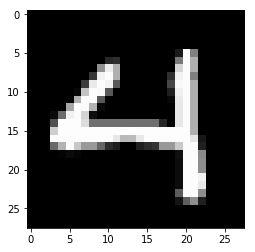

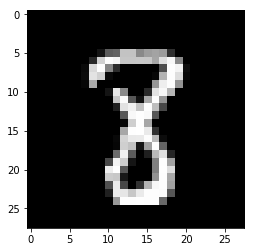

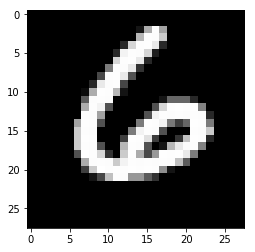

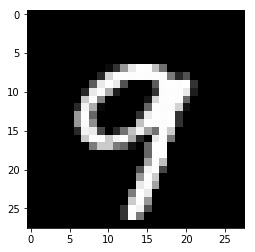

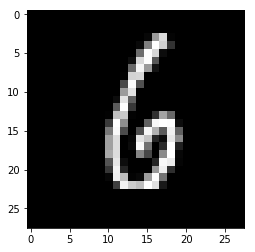

In [2]:
# Ques 1: Program to display MNIST data

# import the libraries and data
from matplotlib import pyplot as plt
import numpy as np
import random as random
from tensorflow.examples.tutorials.mnist import input_data

#load mnist data 
mnist = input_data.read_data_sets('MNIST_data', one_hot = True)

# function to display MNIST images
def showImage(imageIndex):
    image = mnist.train.images[imageIndex]
    image = np.array(image, dtype='float')
    pixels = image.reshape((28, 28))
    plt.imshow(pixels, cmap='gray')
    plt.show()
    
# call showImage for random numbers
for index in range(0,5):
    showImage(random.randint(0, mnist.train.images.shape[0]))

In [6]:
# Ques 2 : Script that does cross validation without using cross_val_score function

# import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, metrics, model_selection
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
from tensorflow.contrib import learn
from sklearn.utils import shuffle

# load iris data
iris_data = np.loadtxt('iris.data',delimiter=',')

# cross validation using sklearn function
x = iris_data[:,0:4]
y = iris_data[:,4]
CV=10
#SVM model
scores = model_selection.cross_val_score(svm.SVC(kernel='linear'), x, y, cv=CV)
print("Accuracy on iris data: %0.4f (+/- %0.4f) using sklearn function for SVM method " % (scores.mean(), scores.std()))
#RFC model
scores = model_selection.cross_val_score(RandomForestClassifier(n_estimators=10), x, y, cv=CV)
print("Accuracy on iris data: %0.4f (+/- %0.4f) using sklearn function for RFC method " % (scores.mean(), scores.std()))

# cross validation without using sklearn 
# a function to partition the dataset according to the loopcount(repetition)
def partitionData(loopCount):
    noOfFold = 10;
    partitionSize = len(iris_data)/noOfFold;
    startIndex = int(partitionSize*loopCount)
    endIndex = int(partitionSize*(loopCount+1))
    # define validation and training set
    testSet = iris_data[startIndex:endIndex]
    trainingSet = np.concatenate((iris_data[:startIndex], iris_data[endIndex:]))
    return trainingSet, testSet;

# shuffle iris data for better score
np.random.shuffle(iris_data)
test_scores_svm=[]
test_scores_rfc=[]
noOfFold = 10
#cross validation over 10 repetitions
for loopCount in range(0,noOfFold):
    partitionData(loopCount)
    trainingSet, testSet = partitionData(loopCount)
    #extract training data and label from training set
    train_x = trainingSet[:,0:4]
    train_y = trainingSet[:,4]
    #extract test data and label from test set
    test_x = testSet[:,0:4]
    test_y = testSet[:,4]
    # fit model on a training set and test the test data using SVM method
    model = svm.SVC(kernel='linear')
    model.fit(train_x,train_y)
    predicted_y_svm = model.predict(test_x)
    test_scores_svm.append(np.mean(test_y == predicted_y_svm))
    # fit model on a training set and test the test data using RFC method
    model = RandomForestClassifier(n_estimators=10)
    model.fit(train_x,train_y)
    predicted_y_rfc = model.predict(test_x)
    test_scores_rfc.append(np.mean(test_y == predicted_y_rfc))
# calculate mean of all the test scores from all the k repetitions
# SVM method
print("Accuracy on iris data: %0.4f (+/- %0.4f) without using sklearn function for SVM method" 
            % (np.mean(test_scores_svm), np.std(test_scores_svm)))
# RFC method
print("Accuracy on iris data: %0.4f (+/- %0.4f) without using sklearn function for RFC method"
            % (np.mean(test_scores_rfc), np.std(test_scores_svm)))

Accuracy on iris data: 0.9733 (+/- 0.0442) using sklearn function for SVM method 
Accuracy on iris data: 0.9467 (+/- 0.0581) using sklearn function for RFC method 
Accuracy on iris data: 0.9867 (+/- 0.0267) without using sklearn function for SVM method
Accuracy on iris data: 0.9600 (+/- 0.0267) without using sklearn function for RFC method


In [11]:
# import the libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, metrics, model_selection
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
from tensorflow.contrib import learn

svm_model_score = []
rfc_model_score = []
mlp_model_score = []

# method to define the class data for every class for every repetition
def classData(index,partitionStart,partitionEnd):
    partitionSize = 10;
    startIndex = int((partitionSize*index)+partitionStart)
    endIndex = int((partitionSize*(index+1))+partitionStart)
    testSet = wine_train_data[startIndex:endIndex]
    trainingSet = np.concatenate((wine_train_data[partitionStart:startIndex],
                                  wine_train_data[endIndex:partitionEnd]))
    return trainingSet, testSet;

# load wine data
wine_train_data = np.loadtxt('wine.train',delimiter=',')
wine_test_data = np.loadtxt('wine.test',delimiter=',')
# this loop will take the data from every class and appply models for testing 
for index in range(0,4):
    # load class 1 data , partition start from 0 
    trainingSetClass1,testSetClass1 = classData(index,0,40)
    # load class 2 data , partition start from 40 
    trainingSetClass2,testSetClass2 = classData(index,40,80)
    # load class 3 data , partition start from 80
    trainingSetClass3,testSetClass3 = classData(index,80,120)
    #concatenate training set from all the classes
    trainingSetAllClass = np.concatenate((trainingSetClass1,trainingSetClass2,trainingSetClass3))
    #concatenate test set from all the classes
    testSetAllClass = np.concatenate((testSetClass1,testSetClass2,testSetClass3))
    #extract features and labels 
    trainingSetAllClass_x = trainingSetAllClass[:,1:13]
    trainingSetAllClass_y = trainingSetAllClass[:,0]
    trainingSetAllClass_y_int = trainingSetAllClass_y.astype(int)
    testSetAllClass_x = testSetAllClass[:,1:13]
    testSetAllClass_y = testSetAllClass[:,0]
    testSetAllClass_y_int = testSetAllClass_y.astype(int)
    #apply svm model
    model = svm.SVC(kernel='linear')
    model.fit(trainingSetAllClass_x,trainingSetAllClass_y)
    predicted_y = model.predict(testSetAllClass_x)
    svm_model_score.append(np.mean(testSetAllClass_y == predicted_y))
    #apply rfc model
    model = RandomForestClassifier(n_estimators=10)
    model.fit(trainingSetAllClass_x,trainingSetAllClass_y)
    predicted_y = model.predict(testSetAllClass_x)
    rfc_model_score.append(np.mean(testSetAllClass_y == predicted_y))
    #apply mlp model
    model= learn.DNNClassifier(
        feature_columns= [tf.contrib.layers.real_valued_column("", dimension=4)],
        hidden_units = [10, 20, 10],
        n_classes = 4)
    model.fit(trainingSetAllClass_x,trainingSetAllClass_y_int,steps = 100, batch_size = 75)
    predicted_y=list(model.predict(testSetAllClass_x,as_iterable=True))
    mlp_model_score.append(np.mean(testSetAllClass_y_int == predicted_y))
#final model selection
print("Accuracy on wine data: %0.4f (+/- %0.4f) for SVM method" 
            % (np.mean(svm_model_score), np.std(svm_model_score)))
print("Accuracy on wine data: %0.4f (+/- %0.4f) for RFC method" 
            % (np.mean(rfc_model_score), np.std(rfc_model_score)))
print("Accuracy on wine data: %0.4f (+/- %0.4f) for MLP method" 
            % (np.mean(mlp_model_score), np.std(mlp_model_score)))

# SVM model is selected based on the results
# train whole wine_data on SVM
x_train = wine_train_data[:,1:13]
y_train = wine_train_data[:,0]
x_test = wine_test_data[:,1:13]
model = svm.SVC(kernel='linear')
model.fit(x_train,y_train)
predicted_y = model.predict(x_test)
predicted_y_int = predicted_y.astype(int)
np.savetxt("foo.csv", predicted_y_int)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000186189ACF60>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'C:\\Users\\SHIPRA~2\\AppData\\Local\\Temp\\tmpxul51wjl'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\SHIPRA~2\AppData\Local\Temp\tmpxul51wjl\model.ckpt.
INFO:tensorflow:loss = 2.867961, step = 1
INFO:tensorflow:Saving checkpoints for 100 into C:\Users\SHIPRA~2\AppData\Local\Temp\tmp